# Housing price prediction in Bogota, Colombia
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict the price of a house located in the city of Bogota, Colombia, based on known characteristics of the property to be sold. The real estate data to train the model were obtained by web scraping, using Selenium and Beautiful Soap from the fincaraiz.com.co portal; as explained in the jupyter notebook `webScraping_housing.ipynb`. It is clarified that the project has no commercial purposes but eminently academic.

_Updated: Dic 01th, 2024_

## Data understanding

### Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [ ]:
# Definition of column names
cols = ['habitaciones', 'baños', 'parqueaderos', 'area_construida', 'area_privada', 'estrato', 'estado', 'antiguedad',
        'administracion', 'precio_m2', 'Ascensor', 'Circuito cerrado de TV', 'Parqueadero Visitantes', 'Portería / Recepción',
        'Zonas Verdes', 'Salón Comunal', 'Balcón', 'Barra estilo americano', 'Calentador', 'Chimenea', 'Citófono',
        'Cocina Integral', 'Terraza', 'Vigilancia', 'Parques cercanos', 'Estudio', 'Patio', 'Depósito / Bodega',
        'nombre', 'ubicacion', 'precio']
data = pd.read_csv('/content/drive/MyDrive/data/housing_fincaraiz.csv', sep=';', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()


(8428, 31)


,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2,2,1,92,92,4,No definida,9 a 15 aÃ±os,622000,"6521739,13",...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000
1,1,2,1,56,56,6,No definida,1 a 8 aÃ±os,523000,"8392857,14",...,0,1,0,0,0,0,0,Apartamento,Calleja Baja,470000000
2,3,4,2,144,144,6,No definida,16 a 30 aÃ±os,620000,"6597222,22",...,0,0,0,0,0,0,0,Apartamento,Cerros de Suba,950000000
3,1,1,0,31,31,4,Excelente,menor a 1 aÃ±o,130000,"7419354,84",...,0,0,0,0,0,0,0,Apartamento,Mazuren,230000000
4,3,2,1,52,52,4,No definida,1 a 8 aÃ±os,219000,"5576923,08",...,0,0,0,0,0,0,0,Apartamento,El plan,290000000


### Verify data types

In [ ]:
data.dtypes

habitaciones               int64
baños                      int64
parqueaderos               int64
area_construida            int64
area_privada               int64
estrato                    int64
estado                    object
antiguedad                object
administracion            object
precio_m2                 object
Ascensor                   int64
Circuito cerrado de TV     int64
Parqueadero Visitantes     int64
Portería / Recepción       int64
Zonas Verdes               int64
Salón Comunal              int64
Balcón                     int64
Barra estilo americano     int64
Calentador                 int64
Chimenea                   int64
Citófono                   int64
Cocina Integral            int64
Terraza                    int64
Vigilancia                 int64
Parques cercanos           int64
Estudio                    int64
Patio                      int64
Depósito / Bodega          int64
nombre                    object
ubicacion                 object
precio    

### Count unique values for each variable

In [ ]:
data.nunique()

habitaciones                17
baños                       11
parqueaderos                11
area_construida            472
area_privada               449
estrato                      7
estado                       4
antiguedad                   6
administracion            1483
precio_m2                 3854
Ascensor                     2
Circuito cerrado de TV       2
Parqueadero Visitantes       2
Portería / Recepción         2
Zonas Verdes                 2
Salón Comunal                2
Balcón                       2
Barra estilo americano       2
Calentador                   2
Chimenea                     2
Citófono                     2
Cocina Integral              2
Terraza                      2
Vigilancia                   2
Parques cercanos             2
Estudio                      2
Patio                        2
Depósito / Bodega            2
nombre                       2
ubicacion                 1041
precio                     919
dtype: int64

In [ ]:
# Displaying unique values for selected columns
print("Unique values for 'habitaciones':", data['habitaciones'].unique().tolist())
print("Unique values for 'baños':", data['baños'].unique().tolist())
print("Unique values for 'parqueaderos':", data['parqueaderos'].unique().tolist())
print("Unique values for 'estrato':", data['estrato'].unique().tolist())
print("Unique values for 'estado':", data['estado'].unique().tolist())
print("Unique values for 'antiguedad':", data['antiguedad'].unique().tolist())
print("Unique values for 'nombre':", data['nombre'].unique().tolist())

[2, 1, 3, 4, 10, 6, 12, 5, 9, 11, 8, 0, 13, 7, 15, 14, 16]
[2, 4, 1, 3, 5, 6, 7, 0, 8, 10, 9]
[1, 2, 0, 3, 4, 6, 5, 8, 10, 9, 7]
[4, 6, 3, 5, 1, 2, 0]
['No definida', 'Excelente', 'Bueno', 'Remodelado']
['9 a 15 aÃ±os', '1 a 8 aÃ±os', '16 a 30 aÃ±os', 'menor a 1 aÃ±o', 'mÃ¡s de 30 aÃ±os', 'No definida']
['Apartamento', 'Casa']


In [ ]:
# Displaying value counts for 'nombre' column in percentage format
print("Value counts for 'nombre' (%):")
print(data['nombre'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Apartamento    78.8%
Casa           21.2%
Name: nombre, dtype: object


### Data transformation

In [ ]:
# Filtering dataset for rows where 'nombre' is 'Apartamento' and dropping selected columns
datacc = data[data['nombre'] == 'Apartamento'].copy()
datacc.drop(['estado', 'antiguedad', 'administracion'], axis=1, inplace=True)
datacc.shape

(6643, 28)

In [ ]:
# datacc = pd.get_dummies(datacc, columns=['nombre'])
datacc.head()

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,precio_m2,Ascensor,Circuito cerrado de TV,Parqueadero Visitantes,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,ubicacion,precio,nombre_Apartamento
0,2,2,1,92,92,4,"6521739,13",1,1,1,...,0,1,0,0,0,0,0,Centro Internacional,600000000,1
1,1,2,1,56,56,6,"8392857,14",1,0,1,...,0,1,0,0,0,0,0,Calleja Baja,470000000,1
2,3,4,2,144,144,6,"6597222,22",1,0,0,...,0,0,0,0,0,0,0,Cerros de Suba,950000000,1
3,1,1,0,31,31,4,"7419354,84",1,1,1,...,0,0,0,0,0,0,0,Mazuren,230000000,1
4,3,2,1,52,52,4,"5576923,08",1,1,1,...,0,0,0,0,0,0,0,El plan,290000000,1


#### Transform 'precio_m2' to numerical

In [ ]:
# Converting 'precio_m2' column to numeric
datacc['precio_m2'] = pd.to_numeric(datacc['precio_m2'].str.replace(',', '.', regex=False))
datacc.dtypes

habitaciones                int64
baños                       int64
parqueaderos                int64
area_construida             int64
area_privada                int64
estrato                     int64
precio_m2                 float64
Ascensor                    int64
Circuito cerrado de TV      int64
Parqueadero Visitantes      int64
Portería / Recepción        int64
Zonas Verdes                int64
Salón Comunal               int64
Balcón                      int64
Barra estilo americano      int64
Calentador                  int64
Chimenea                    int64
Citófono                    int64
Cocina Integral             int64
Terraza                     int64
Vigilancia                  int64
Parques cercanos            int64
Estudio                     int64
Patio                       int64
Depósito / Bodega           int64
ubicacion                  object
precio                      int64
nombre_Apartamento          uint8
dtype: object

##### Transform 'ubicación' to categorical

In [ ]:
# Transforming 'ubicacion' variable to categorical and creating a mapping to numeric codes
datacc['ubicacion'] = pd.Categorical(datacc['ubicacion'])
ubicacion_mapping = {category: code for code, category in enumerate(datacc['ubicacion'].cat.categories)}
print("Ubicacion Mapping:", ubicacion_mapping)

# Converting 'ubicacion' to numeric categorical variable
datacc['ubicacion'] = datacc['ubicacion'].cat.codes

habitaciones                 int64
baños                        int64
parqueaderos                 int64
area_construida              int64
area_privada                 int64
estrato                      int64
precio_m2                  float64
Ascensor                     int64
Circuito cerrado de TV       int64
Parqueadero Visitantes       int64
Portería / Recepción         int64
Zonas Verdes                 int64
Salón Comunal                int64
Balcón                       int64
Barra estilo americano       int64
Calentador                   int64
Chimenea                     int64
Citófono                     int64
Cocina Integral              int64
Terraza                      int64
Vigilancia                   int64
Parques cercanos             int64
Estudio                      int64
Patio                        int64
Depósito / Bodega            int64
ubicacion                 category
precio                       int64
nombre_Apartamento           uint8
dtype: object

## Data Exploration

In [ ]:
# Descriptive statistics for selected numerical columns
print(datacc[['habitaciones', 'baños', 'parqueaderos', 'area_construida', 'area_privada', 'estrato', 'precio_m2', 'precio']].describe())

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,precio_m2,precio
count,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6.643000e+03,6.643000e+03
mean,2.669878,2.469517,1.427668,153.279994,108.102363,4.449195,7.001884e+06,7.132005e+08
std,0.780584,1.082739,1.003156,1964.912074,1718.173119,1.234211,1.001492e+08,3.082202e+09
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,3.444440e+03,1.950000e+06
25%,2.000000,2.000000,1.000000,60.000000,33.000000,3.000000,4.413874e+06,2.925000e+08
50%,3.000000,2.000000,1.000000,83.000000,68.000000,4.000000,5.444444e+06,4.600000e+08
75%,3.000000,3.000000,2.000000,128.000000,111.000000,6.000000,6.792453e+06,7.852577e+08
max,8.000000,8.000000,10.000000,139000.000000,139000.000000,6.000000,8.166667e+09,2.450000e+11


In [ ]:
# Descriptive statistics for non-numerical columns
# Frequency count for 'ubicacion'
print("Frequency count for 'ubicacion':")
print(datacc['ubicacion'].value_counts())

# Mode for 'ubicacion'
print("Mode for 'ubicacion':", datacc['ubicacion'].mode()[0])

# Cardinality (number of unique categories) for 'ubicacion'
print("Cardinality for 'ubicacion':", datacc['ubicacion'].nunique())

# Proportion of each category for 'ubicacion'
print("Proportion of each category for 'ubicacion' (%):")
print(datacc['ubicacion'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

#### Histograms

<AxesSubplot:xlabel='precio', ylabel='Count'>

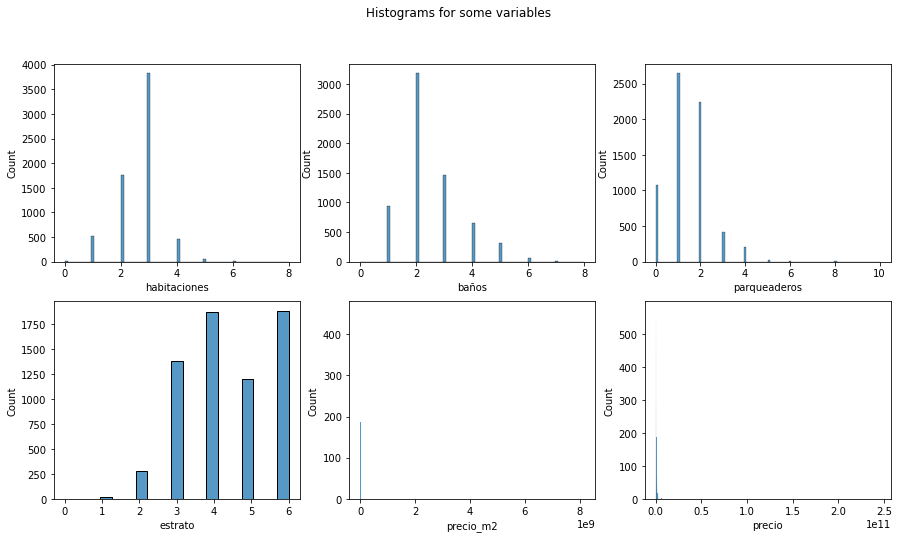

In [ ]:
# Histograms after outliers treatment
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc2['habitaciones'], ax=ax1)
sns.histplot(datacc2['baños'], ax=ax2)
sns.histplot(datacc2['parqueaderos'], ax=ax3)
sns.histplot(datacc2['estrato'], ax=ax4)
sns.histplot(datacc2['precio_m2'], ax=ax5)
sns.histplot(datacc2['precio'], ax=ax6)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Boxplots

<AxesSubplot:>

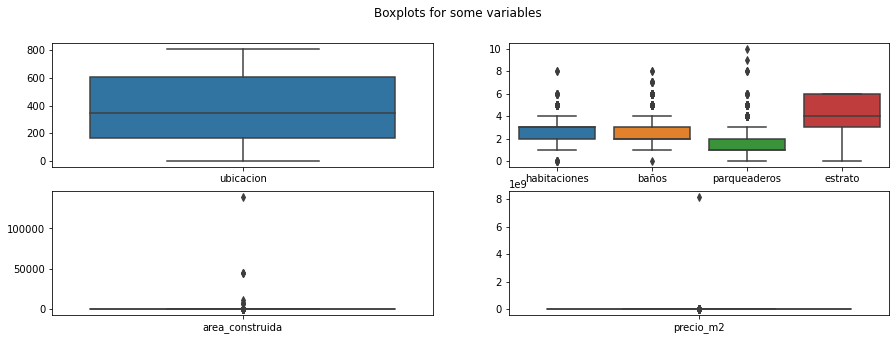

In [ ]:
# Boxplots for some variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots for some variables')
sns.boxplot(x=datacc['ubicacion'], ax=ax1)
sns.boxplot(data=datacc[['habitaciones', 'baños', 'parqueaderos', 'estrato']], ax=ax2)
sns.boxplot(x=datacc['area_construida'], ax=ax3)
sns.boxplot(x=datacc['precio_m2'], ax=ax4)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

{'whiskers': [<matplotlib.lines.Line2D at 0x190ca145c48>,
 'caps': [<matplotlib.lines.Line2D at 0x190ca18f2c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x190ca0aa488>],
 'medians': [<matplotlib.lines.Line2D at 0x190ca196c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x190ca1c4b48>],
 'means': []}

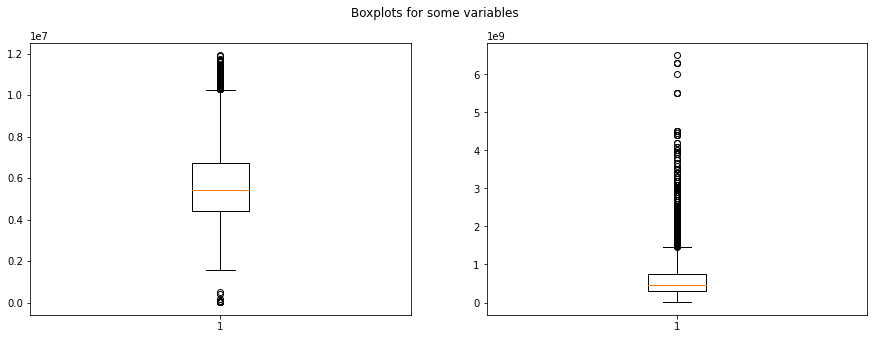

In [ ]:
# Z score to eliminate aoutliers of 'precio_m2' and 'precio'
from scipy import stats

#find absolute value of z-score for each observation of 'precio'
z1 = np.abs(stats.zscore(datacc['precio']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.precio[(z1>3)].index
datacc2 = datacc.drop(toremove)

#find absolute value of z-score for each observation of 'precio_m2'
z2 = np.abs(stats.zscore(datacc2['precio_m2']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc2.precio_m2[(z2>3)].index
datacc2 = datacc2.drop(toremove)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
ax1.boxplot(datacc2[['precio_m2']])
ax2.boxplot(datacc2[['precio']])

(3322, 28)


{'whiskers': [<matplotlib.lines.Line2D at 0x2a9a66b3808>,
 'caps': [<matplotlib.lines.Line2D at 0x2a9a671cd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a9a670d788>],
 'medians': [<matplotlib.lines.Line2D at 0x2a9a6740408>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a9a67503c8>],
 'means': []}

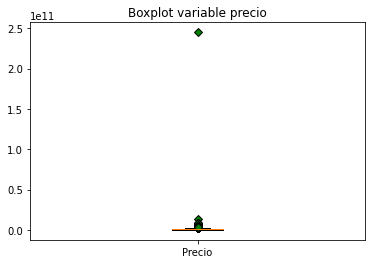

In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = datacc['precio'].quantile(q=.25)
Q3 = datacc['precio'].quantile(q=.75)
IQR = datacc['precio'].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
toremove = datacc.precio[~((datacc.precio < (Q1-1.5*IQR)) | (datacc.precio > (Q3+1.5*IQR)))].index
datacc3 = datacc.drop(toremove)

#find how many rows are left in the dataframe
print(datacc3.shape)

#Boxplot
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot variable precio')
ax.boxplot(datacc3['precio'], flierprops=green_diamond, labels=["Precio"])

<AxesSubplot:xlabel='precio', ylabel='Count'>

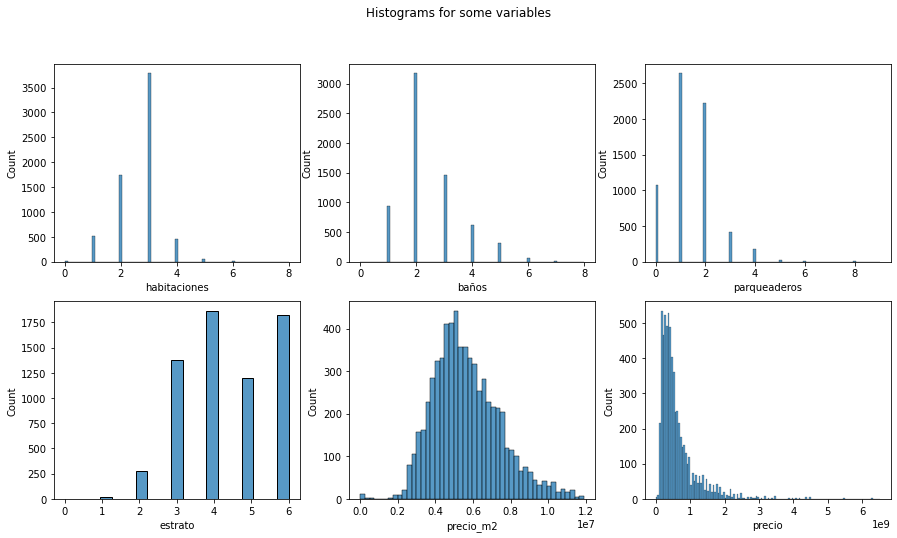

In [ ]:
# Boxplots for 'precio_m2' and 'precio' after outlier removal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Boxplots for precio_m2 and precio after outlier removal')
sns.boxplot(x=datacc2['precio_m2'], ax=ax1)
sns.boxplot(x=datacc2['precio'], ax=ax2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### EDA (Exploratory Data Analysis)

In [ ]:
# Dimensionality reduction with PCA
features = datacc2.drop(columns=['precio'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)

# Creating new DataFrame with principal components at 95%
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
datacc_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

# Display the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:", pca.explained_variance_ratio_)

# Display the shape of the dataset after PCA
datacc_pca['precio'] = datacc2['precio'].reset_index(drop=True)
print(datacc_pca.shape)
display(datacc_pca.head())

In [ ]:
# X = datacc2.drop('precio', axis=1)
# print(X.shape)
X = datacc2[['habitaciones', 'baños', 'parqueaderos','area_construida','estrato','precio_m2', 'ubicacion']].copy()
# X = datacc2[['habitaciones', 'baños', 'parqueaderos','area_construida','estrato','precio_m2']].copy()
# X = datacc2[['habitaciones', 'baños', 'parqueaderos','area_construida','estrato']].copy()
print(X.shape)

Y=pd.DataFrame()
Y = datacc2['precio']
print(Y.shape)

(6560, 7)
(6560,)


#### Correlations

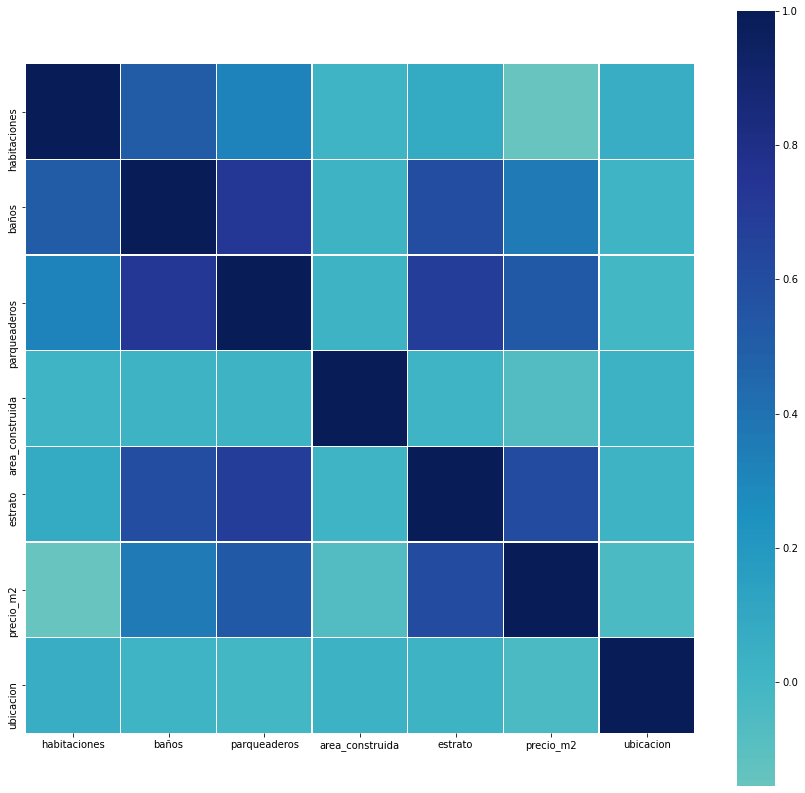

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X)

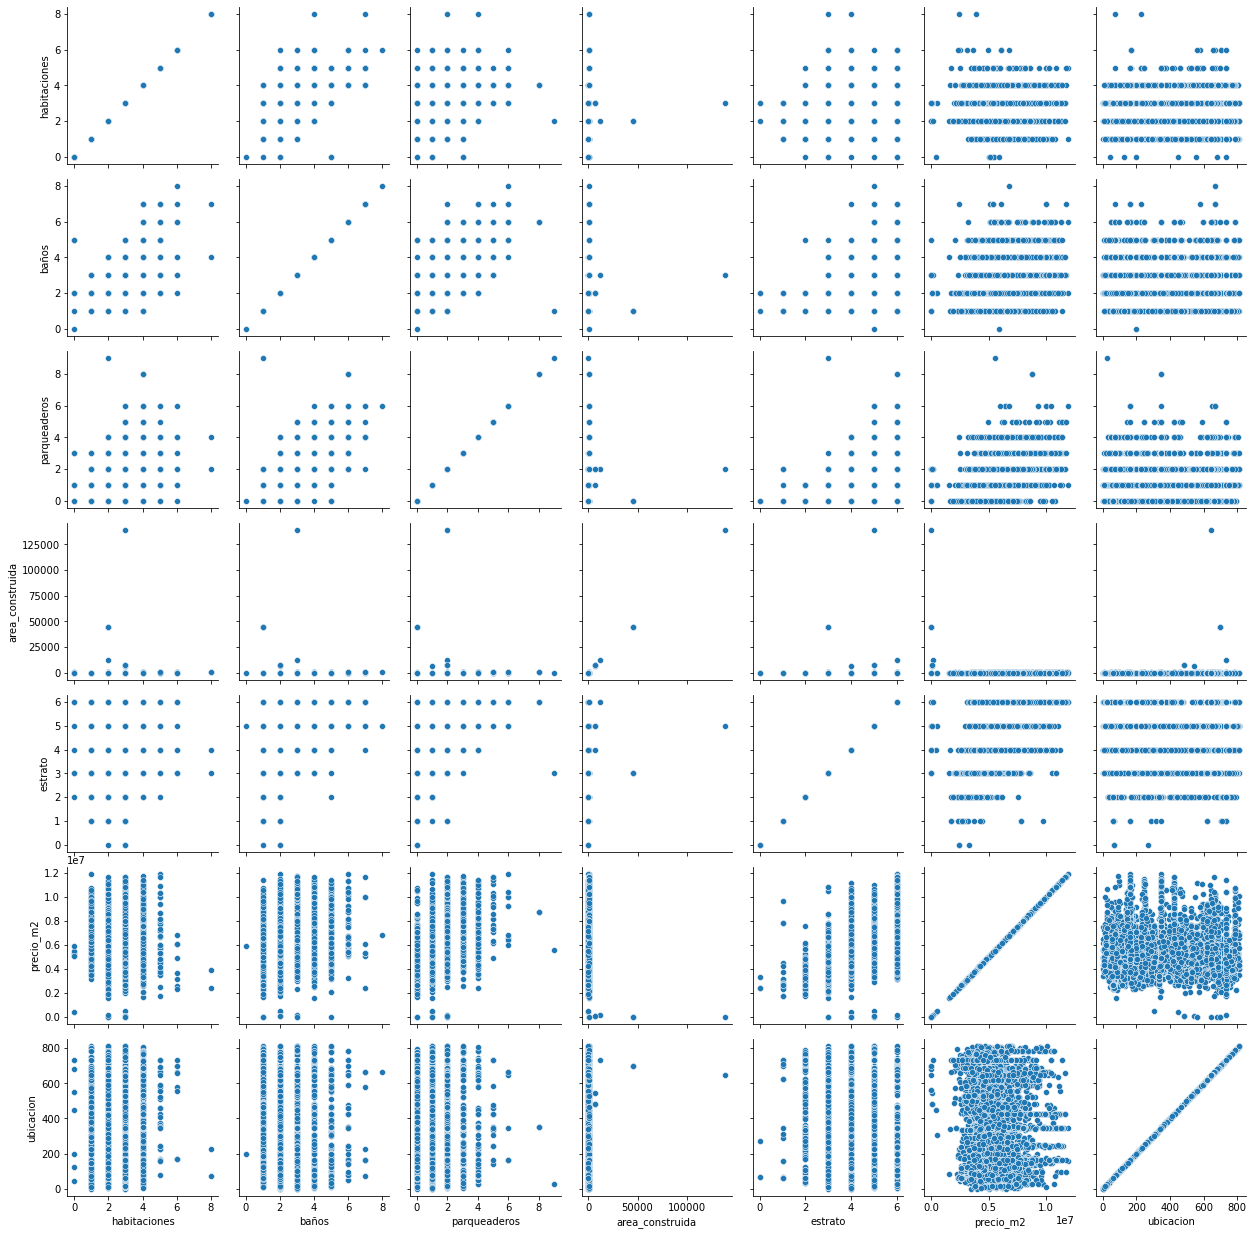

In [ ]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE

### Data partitioning


In [ ]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(6560, 7)

In [ ]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.30,
                                         random_state=42)

### Multivariate lineal regression

In [ ]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# accuracy check
mse = MSE(y_test, y_pred1)
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 98297055155643952.00
RMSE: 313523611.80
MAE: 197942298.68
R2: 0.73


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# model2 = lgb.LGBMRegressor(learning_rate=0.05, max_depth=-5, random_state=42)
# model2.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)],
        #   verbose=0, eval_metric='logloss')

In [ ]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 3.73107e+08	valid_0's l2: 3.3318e+17
[2]	valid_0's l1: 3.56741e+08	valid_0's l2: 3.05728e+17
[3]	valid_0's l1: 3.41254e+08	valid_0's l2: 2.8077e+17
[4]	valid_0's l1: 3.26868e+08	valid_0's l2: 2.58235e+17
[5]	valid_0's l1: 3.13723e+08	valid_0's l2: 2.3714e+17
[6]	valid_0's l1: 3.00312e+08	valid_0's l2: 2.17207e+17
[7]	valid_0's l1: 2.88018e+08	valid_0's l2: 1.99863e+17
[8]	valid_0's l1: 2.7627e+08	valid_0's l2: 1.84247e+17
[9]	valid_0's l1: 2.6507e+08	valid_0's l2: 1.69896e+17
[10]	valid_0's l1: 2.5383e+08	valid_0's l2: 1.56279e+17
[11]	valid_0's l1: 2.4365e+08	valid_0's l2: 1.44268e+17
[12]	valid_0's l1: 2.33887e+08	valid_0's l2: 1.32355e+17
[13]	valid_0's l1: 2.2421e+08	valid_0's l2: 1.21659e+17
[14]	valid_0's l1: 2.15282e+08	valid_0's l2: 1.12428e+17
[15]	valid_0's l1: 2.06775e+08	valid_0's l2: 1.0366e+1

In [ ]:
# accuracy check
mse = MSE(y_test, y_pred2)
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 3356772068556116.50
RMSE: 57937656.74
MAE: 22849275.93
R2: 0.99


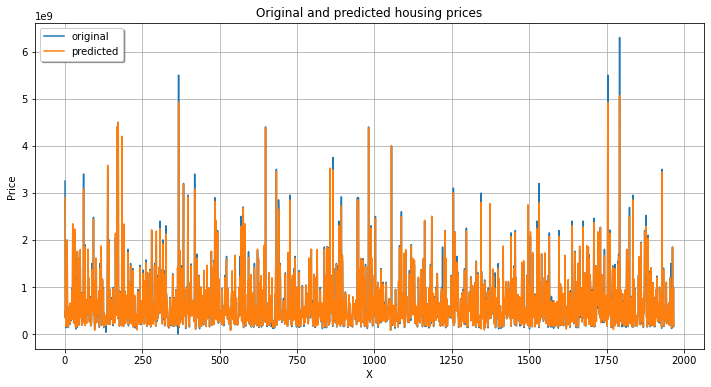

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted housing prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

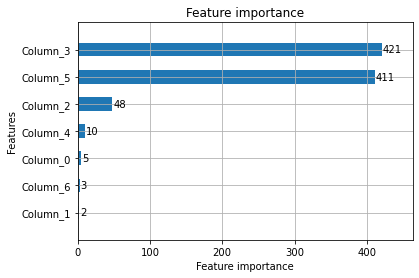

In [ ]:
# plotting feature importance
lgb.plot_importance(model2, height=.5)

<AxesSubplot:>

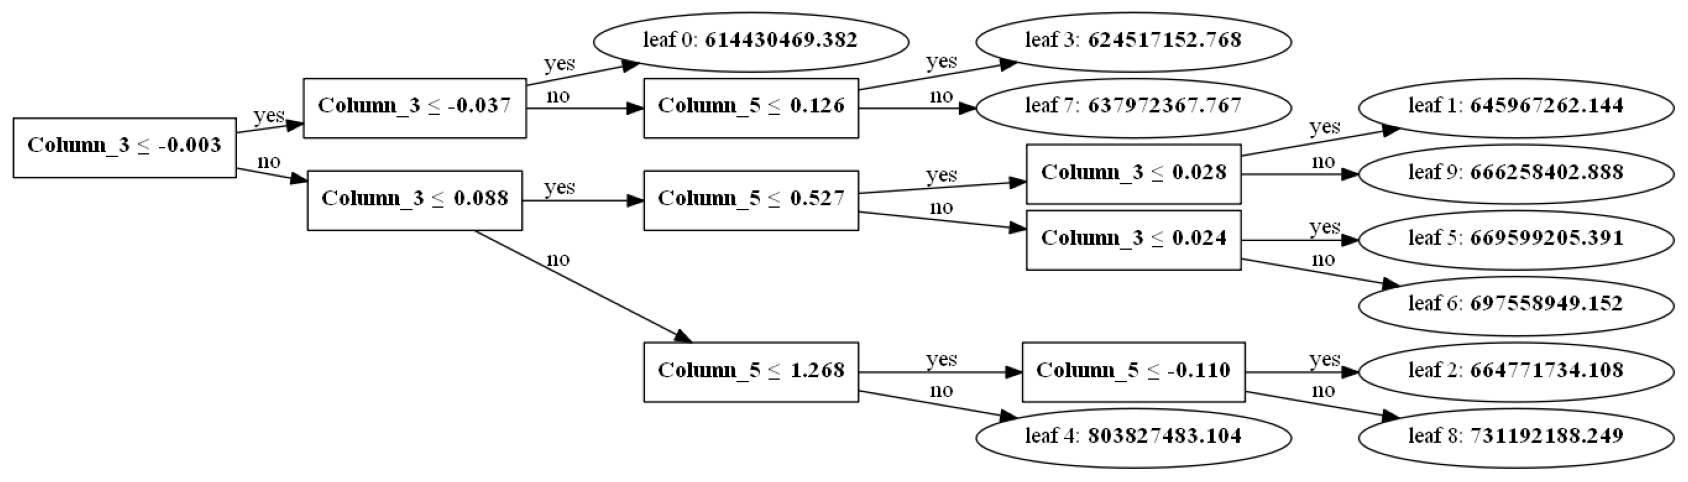

In [ ]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred3 = xg_reg.predict(X_test)

In [ ]:
# accuracy check
mse = MSE(y_test, y_pred3)
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 2040010403992725.00
RMSE: 45166474.34
MAE: 13070380.33
R2: 0.99


### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
#Define model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [ ]:
#Training
xg_reg.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=123,
             reg_alpha=5, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [ ]:
#K-fold cross validation
scores = cross_val_score(xg_reg, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [ ]:
# Pred
y_pred4 = xg_reg.predict(X_test)

In [ ]:
# accuracy check
mse = MSE(y_test, y_pred4)
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 1954603701615888.75
RMSE: 44210900.26
MAE: 10824998.23
R2: 0.99


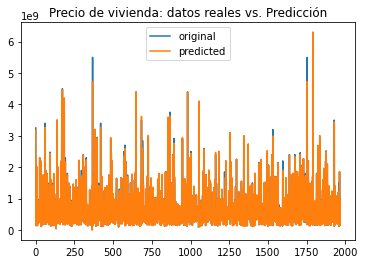

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Precio de vivienda: datos reales vs. Predicción")
plt.legend()
plt.show()

## References

https://github.com/kiteco/kite-python-blog-post-code/blob/master/Web%20Scraping%20Tutorial/script.py

https://medium.com/geekculture/scrappy-guide-to-web-scraping-with-python-475385364381

https://stackoverflow.com/questions/47730671/python-3-using-requests-does-not-get-the-full-content-of-a-web-page